Trying a linear regression for values below a certain threshold, less than 10% of the average.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'short'
DS = xr.open_dataset(dataDIR)

In [3]:
#Temperature:
T = (DS.T.values + DS.T0) * ((DS.P.values + DS.PB.values)/DS.P0)**(DS.R_D/DS.CP)

In [4]:
T.shape #days, height, latitude, longtitude

(240, 52, 36, 72)

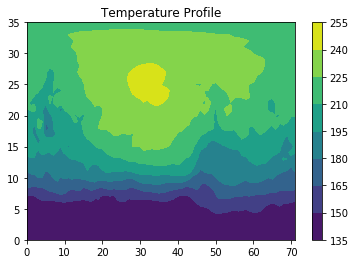

In [5]:
example_data = T[50,5,:, :]
plt.contourf(example_data)
plt.colorbar()
plt.title("Temperature Profile")
plt.show()

In [6]:
albedo = DS.ALBEDO.values

In [7]:
albedo.shape #days, latitude, longtitude

(240, 36, 72)

In [8]:
st = DS.TSK.values

In [9]:
st.shape

(240, 36, 72)

In [10]:
d_c = DS.TAU_OD.values

In [11]:
d_c.shape 

(240, 52, 36, 72)

In [12]:
tsf = DS.TOASW.values #top solar flux

In [13]:
tsf.shape

(240, 36, 72)

In [14]:
albedo = DS.ALBEDO.values

In [15]:
bsf = DS.GSW.values #bottom solar flux, ouput

In [16]:
bsf2 = bsf/(1-albedo)

In [17]:
bsf.shape

(240, 36, 72)

Let's combine the data together for one time snapshot, full latitude and longitude:

In [18]:
e_t = [] #equator input and output
#input:
for i in range(36):
    for j in range(72):
        input_array = list(T[3,:,i,j]) #start with temp profile
        input_array+=list(d_c[3,:,i,j]) #add dust profile
        input_array.append(st[3,i,j])#add surface temp
        input_array.append(tsf[3,i,j]) #add top solar flux, without the albedo factor
        input_array.append(bsf2[3,i,j])            
        e_t.append(input_array) #appends input to input array

In [19]:
e_t = np.array(e_t)
e_t.shape

(2592, 107)

In [20]:
e_d = pd.DataFrame(e_t) 

In [21]:
e_rems = e_d[e_d.iloc[:,105] < 20] #remove small values, less than 10% of the average
e_rems0 = e_rems[e_rems.iloc[:,105] != 0] #remove 0

In [22]:
e_rems0

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
365,147.742233,147.876221,147.798431,147.582657,147.316147,147.010193,146.718155,146.459152,146.275452,146.138046,...,4.746388e-08,3.247288e-08,2.146511e-08,1.358391e-08,8.082941e-09,4.437911e-09,2.266124e-09,146.207458,19.076994,10.461836
366,146.992935,147.033279,146.897354,146.657303,146.401001,146.140060,145.907166,145.699799,145.584686,145.511551,...,4.680932e-08,3.202883e-08,2.117563e-08,1.340510e-08,7.981376e-09,4.387530e-09,2.246240e-09,146.112839,11.867635,5.595775
367,146.815872,146.786224,146.616119,146.370193,146.150024,145.991486,145.853104,145.729507,145.661575,145.585510,...,4.570702e-08,3.128103e-08,2.068814e-08,1.310398e-08,7.810339e-09,4.302689e-09,2.212756e-09,145.951523,3.181386,1.315890
427,146.899933,146.991150,146.902206,146.694473,146.469559,146.313034,146.195755,146.288956,147.293808,148.554672,...,4.364940e-08,2.988514e-08,1.977816e-08,1.254188e-08,7.491068e-09,4.144317e-09,2.150250e-09,145.630722,3.187869,1.320547
428,147.281326,147.384018,147.293030,147.083298,146.838791,146.582916,146.332260,145.991669,146.103104,146.886581,...,4.493587e-08,3.075788e-08,2.034710e-08,1.289332e-08,7.690682e-09,4.243334e-09,2.189330e-09,145.828445,11.873467,5.667850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,209.869003,215.366104,224.522156,226.640594,228.248108,228.890961,229.105820,229.047440,228.854355,228.602890,...,7.626431e-08,5.200621e-08,3.419370e-08,2.144052e-08,1.253897e-08,6.640666e-09,3.126329e-09,198.968414,13.193561,5.616200
2269,208.377762,214.262131,223.128281,225.571716,227.304749,228.078308,228.430756,228.484589,228.353943,228.129395,...,7.574498e-08,5.165390e-08,3.396402e-08,2.129864e-08,1.245839e-08,6.600694e-09,3.110553e-09,197.713013,12.513075,5.290639
2270,206.814636,213.219482,221.686157,224.468658,226.345810,227.229965,227.689255,227.863678,227.829391,227.659775,...,7.519107e-08,5.127813e-08,3.371905e-08,2.114733e-08,1.237244e-08,6.558061e-09,3.093727e-09,196.071396,13.194557,5.632765
2271,205.298920,211.735153,220.392014,223.351105,225.426254,226.437805,226.970963,227.229385,227.288956,227.193329,...,7.472329e-08,5.096080e-08,3.351219e-08,2.101955e-08,1.229986e-08,6.522057e-09,3.079517e-09,194.981644,15.232822,6.691784


In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(e_rems0, test_size=0.2, random_state=42)

In [24]:
train_set.shape

(58, 107)

In [25]:
test_set.shape

(15, 107)

In [26]:
train_in = train_set.iloc[:,:106] #training input
train_out = train_set.iloc[:,106] #training output
test_in = test_set.iloc[:,:106] #training input
test_out = test_set.iloc[:,106] #training output
total_in = e_rems0.iloc[:,:106] #total input
total_out = e_rems0.iloc[:,106] #total output


In [27]:
#this provides the location of each point according to the date and latitude
indices = np.array(train_in.index)
all_indices = np.array(total_in.index)

In [28]:
all_indices

array([ 365,  366,  367,  427,  428,  429,  441,  442,  496,  497,  515,
        516,  566,  567,  589,  637,  662,  708,  735,  779,  808,  850,
        880,  922,  953,  993, 1025, 1065, 1098, 1136, 1170, 1208, 1243,
       1279, 1315, 1351, 1388, 1422, 1460, 1494, 1605, 1637, 1678, 1708,
       1750, 1780, 1823, 1851, 1896, 1922, 1968, 1969, 1993, 1994, 2042,
       2064, 2115, 2116, 2134, 2135, 2189, 2190, 2191, 2203, 2204, 2205,
       2266, 2267, 2268, 2269, 2270, 2271, 2272], dtype=int64)

Let's try polynomial regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
lin_reg.fit(train_in,train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(train_in)
lin_mse = mean_squared_error(train_out, train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse  #why is this so much worse!?


0.017714266

In [31]:
np.max(train_out)

9.68858814239502

In [32]:
total_pred = lin_reg.predict(total_in)

In [34]:
train_out = np.array(train_out)
pred_contour = np.full((36, 72), np.nan)
lat_list = []
long_list = []
for i in range(len(indices)):
    lat_point = indices[i]//72
    long_point = indices[i]%72
    lat_list.append(lat_point)
    long_list.append(long_point)
    pred_contour[lat_point][long_point] = train_pred[i]
lat_list = np.array(lat_list)
long_list = np.array(long_list)

out_contour = np.full((36, 72), np.nan)
for i in range(len(indices)):
    lat_point = indices[i]//72
    long_point = indices[i]%72
    out_contour[lat_point][long_point] = train_out[i]  

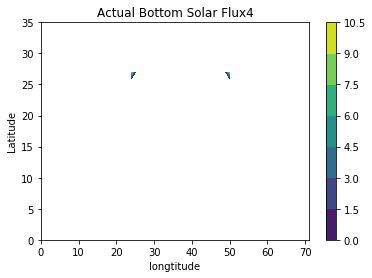

<Figure size 432x288 with 0 Axes>

In [35]:
plt.contourf(out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

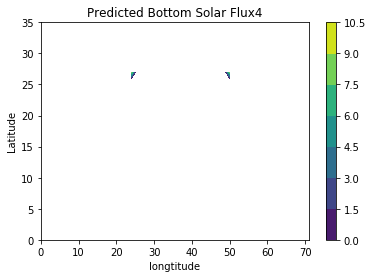

<Figure size 432x288 with 0 Axes>

In [36]:
plt.contourf(pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

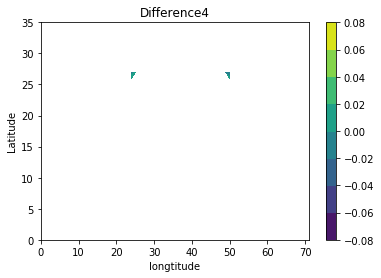

In [37]:
plt.contourf(pred_contour - out_contour)
plt.colorbar()
plt.title("Difference4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()

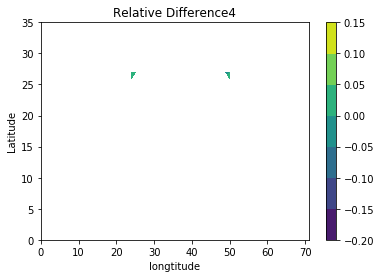

In [38]:
plt.contourf((pred_contour - out_contour)/out_contour)
plt.colorbar()
plt.title("Relative Difference4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()

In [39]:
total_out = np.array(total_out)
full_out_contour = np.full((36, 72), np.nan)
for i in range(len(np.array(total_in.index))):
    lat_point = all_indices[i]//72
    long_point = all_indices[i]%72
    full_out_contour[lat_point][long_point] = total_out[i]

full_pred_contour = np.full((36, 72), np.nan)
for i in range(len(np.array(total_in.index))):
    lat_point = all_indices[i]//72
    long_point = all_indices[i]%72
    full_pred_contour[lat_point][long_point] = total_pred[i]  

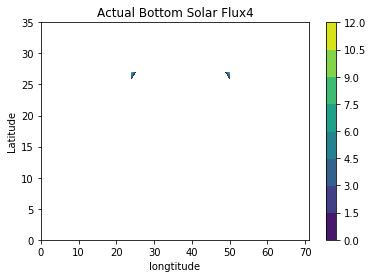

<Figure size 432x288 with 0 Axes>

In [40]:
plt.contourf(full_out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

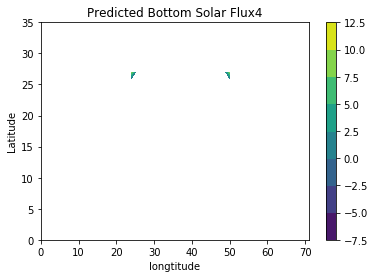

<Figure size 432x288 with 0 Axes>

In [41]:
plt.contourf(full_pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

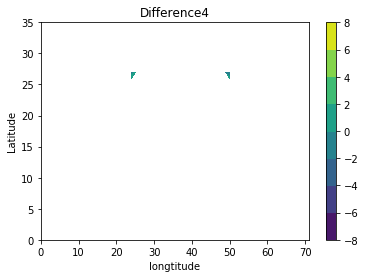

In [42]:
plt.contourf(full_pred_contour - full_out_contour)
plt.colorbar()
plt.title("Difference4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()

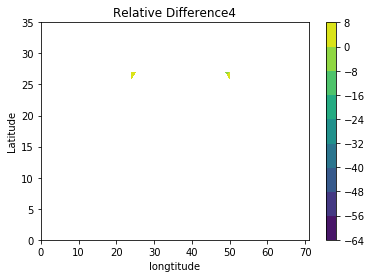

In [43]:
plt.contourf((full_pred_contour - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference4")
plt.xlabel("longtitude")
plt.ylabel("Latitude")
plt.show()

In [44]:
((full_pred_contour - full_out_contour)/full_out_contour)[(full_pred_contour - full_out_contour)/full_out_contour < -1] #nice

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([ -6.01377492,  -1.83761516,  -2.10695797, -56.14897381])